In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import time
from keras.utils import np_utils

In [2]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [4]:
x_dev = x_train[-5000:]
y_dev = y_train[-5000:]
x_train = x_train[:-5000]
y_train = y_train[:-5000]

In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

print(x_dev.shape)
print(x_dev.shape)

(55000, 28, 28)
(10000, 28, 28)
(55000,)
(10000,)
(5000, 28, 28)
(5000, 28, 28)


In [6]:
# one-hot format
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
print(y_train.shape)
print(y_test.shape)

y_dev = np_utils.to_categorical(y_dev, 10)
print(y_dev.shape)

(55000, 10)
(10000, 10)
(5000, 10)


In [7]:
# [0-255] to [0-1]
x_train = x_train / 255.0
x_dev = x_dev / 255.0
x_test = x_test / 255.0

In [8]:
# define model
# 3-layer-NN (512 nodes, 512 nodes, 10 nodes - 2 hidden layers, output layer)
# L2 regulation to prevent overfitting(reduce variance)
# relu activation function for hidden layers & softmax for output layer

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # (60000, 758)
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [9]:
# define optimizer, loss function, metrics

model.compile(
    # Optimizer
    
    optimizer=tf.keras.optimizers.Adam(),
    # Adam = grad descent w momentum + RMSprop
    
    
    # Loss function to minimize

#     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    # use this loss function when 2 or more integer label classes
    # logit = logistic + probit(확률을 재는 단위, = odds(두 확률의 비율)); 값이 0보다 큰지 아닌지, sigmoid의 역함수
    # 라벨값이 0 ~ 9로 되어있기 떄문에 사실은 One Hot Encoding을 해야 하는데,
    # sparse categorical crossentropy 를 사용하면 같은 효과 나와서 따로 하지 않음

    loss='categorical_crossentropy',
#     cross-entropy: a measure of how different your predicted distribution is from the target distribution

    # List of metrics to monitor
    
    metrics=['accuracy']
    # must be list (can be more than one if more than one output)
)

In [10]:
start = time.time()

In [11]:
# train
model_fit = model.fit(x_train, y_train,
    batch_size=128, epochs=10, verbose=1,
    # verbose : 0 silent, 1 progress bar, 2 one line per epoch
    validation_data=(x_dev, y_dev)
)
# epsilon = None (1e-07)

Epoch 1/10
430/430 [==============================] - 3s 5ms/step - loss: 0.3270 - accuracy: 0.9305 - val_loss: 0.1753 - val_accuracy: 0.9738
Epoch 2/10
430/430 [==============================] - 2s 5ms/step - loss: 0.1677 - accuracy: 0.9735 - val_loss: 0.1529 - val_accuracy: 0.9786
Epoch 3/10
430/430 [==============================] - 2s 5ms/step - loss: 0.1344 - accuracy: 0.9808 - val_loss: 0.1424 - val_accuracy: 0.9784
Epoch 4/10
430/430 [==============================] - 2s 5ms/step - loss: 0.1166 - accuracy: 0.9850 - val_loss: 0.1415 - val_accuracy: 0.9796
Epoch 5/10
430/430 [==============================] - 2s 5ms/step - loss: 0.1010 - accuracy: 0.9877 - val_loss: 0.1288 - val_accuracy: 0.9784
Epoch 6/10
430/430 [==============================] - 2s 5ms/step - loss: 0.0951 - accuracy: 0.9886 - val_loss: 0.1249 - val_accuracy: 0.9810
Epoch 7/10
430/430 [==============================] - 2s 5ms/step - loss: 0.0906 - accuracy: 0.9895 - val_loss: 0.1214 - val_accuracy: 0.9826
Epoch 

In [12]:
print('training time: ', time.time() - start)

training time:  22.108110427856445


train loss:  0.07526835054159164
train accuracy:  0.9918727278709412
dev loss:  0.11395689845085144
dev accuracy:  0.9832000136375427


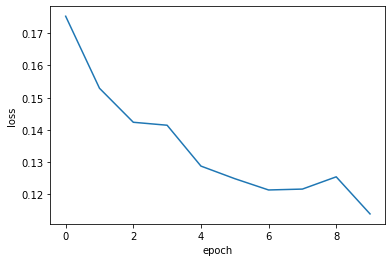

In [13]:
train_loss = model_fit.history['loss'][-1]
train_acc = model_fit.history['accuracy'][-1]
dev_loss = model_fit.history['val_loss'][-1]
dev_acc = model_fit.history['val_accuracy'][-1]

print('train loss: ', train_loss)
print('train accuracy: ', train_acc)

print('dev loss: ', dev_loss)
print('dev accuracy: ', dev_acc)

plt.plot(model_fit.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [14]:
# evaluate
test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=128)

print('test loss: ', test_loss)
print('test accuracy: ', test_acc)

79/79 [==============================] - 0s 2ms/step - loss: 0.1133 - accuracy: 0.9804
test loss:  0.11333359032869339
test accuracy:  0.980400025844574


Epoch 1/10
430/430 [==============================] - 3s 5ms/step - loss: 0.3224 - accuracy: 0.9310 - val_loss: 0.1830 - val_accuracy: 0.9706
Epoch 2/10
430/430 [==============================] - 2s 5ms/step - loss: 0.1670 - accuracy: 0.9740 - val_loss: 0.1717 - val_accuracy: 0.9730
Epoch 3/10
430/430 [==============================] - 2s 5ms/step - loss: 0.1347 - accuracy: 0.9803 - val_loss: 0.1417 - val_accuracy: 0.9784
Epoch 4/10
430/430 [==============================] - 2s 5ms/step - loss: 0.1140 - accuracy: 0.9846 - val_loss: 0.1348 - val_accuracy: 0.9790
Epoch 5/10
430/430 [==============================] - 2s 5ms/step - loss: 0.1013 - accuracy: 0.9872 - val_loss: 0.1316 - val_accuracy: 0.9800
Epoch 6/10
430/430 [==============================] - 2s 5ms/step - loss: 0.0944 - accuracy: 0.9885 - val_loss: 0.1318 - val_accuracy: 0.9780
Epoch 7/10
430/430 [==============================] - 2s 5ms/step - loss: 0.0863 - accuracy: 0.9904 - val_loss: 0.1251 - val_accuracy: 0.9816
Epoch 

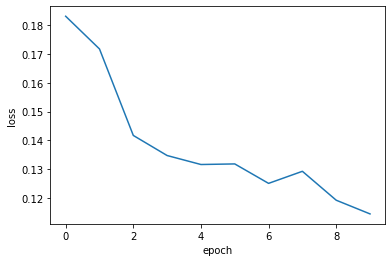

In [15]:
# define model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# define optimizer, loss function, metrics
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# train
model_fit = model.fit(x_train, y_train,
                      batch_size=128, epochs=10, verbose=1,
                      validation_data=(x_dev, y_dev))

print('training time: ', time.time() - start)

print('train loss: ', model_fit.history['loss'][-1])
print('train accuracy: ', model_fit.history['accuracy'][-1])

print('dev loss: ', model_fit.history['val_loss'][-1])
print('dev accuracy: ', model_fit.history['val_accuracy'][-1])

test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=128)
print('test loss: ', test_loss)
print('test accuracy: ', test_acc)

plt.plot(model_fit.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

Epoch 1/5
430/430 [==============================] - 3s 5ms/step - loss: 0.3236 - accuracy: 0.9302 - val_loss: 0.1712 - val_accuracy: 0.9740
Epoch 2/5
430/430 [==============================] - 2s 5ms/step - loss: 0.1677 - accuracy: 0.9738 - val_loss: 0.1570 - val_accuracy: 0.9752
Epoch 3/5
430/430 [==============================] - 2s 5ms/step - loss: 0.1338 - accuracy: 0.9814 - val_loss: 0.1416 - val_accuracy: 0.9784
Epoch 4/5
430/430 [==============================] - 2s 5ms/step - loss: 0.1160 - accuracy: 0.9839 - val_loss: 0.1420 - val_accuracy: 0.9784
Epoch 5/5
430/430 [==============================] - 2s 5ms/step - loss: 0.1043 - accuracy: 0.9871 - val_loss: 0.1376 - val_accuracy: 0.9770
training time:  11.777080774307251
train loss:  0.10428300499916077
train accuracy:  0.9870908856391907
dev loss:  0.13762161135673523
dev accuracy:  0.9769999980926514
79/79 [==============================] - 0s 2ms/step - loss: 0.1482 - accuracy: 0.9742
test loss:  0.14823482930660248
test ac

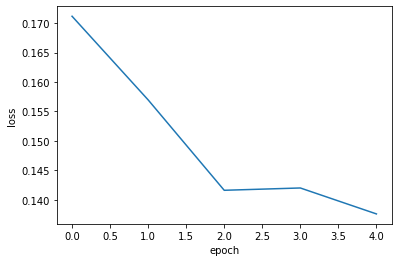

In [16]:
# define model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# define optimizer, loss function, metrics
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# train
model_fit = model.fit(x_train, y_train,
                      batch_size=128, epochs=5, verbose=1,
                      validation_data=(x_dev, y_dev))

print('training time: ', time.time() - start)

print('train loss: ', model_fit.history['loss'][-1])
print('train accuracy: ', model_fit.history['accuracy'][-1])

print('dev loss: ', model_fit.history['val_loss'][-1])
print('dev accuracy: ', model_fit.history['val_accuracy'][-1])

test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=128)
print('test loss: ', test_loss)
print('test accuracy: ', test_acc)

plt.plot(model_fit.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

Epoch 1/5
215/215 [==============================] - 2s 7ms/step - loss: 0.3744 - accuracy: 0.9188 - val_loss: 0.2016 - val_accuracy: 0.9682
Epoch 2/5
215/215 [==============================] - 1s 6ms/step - loss: 0.1876 - accuracy: 0.9694 - val_loss: 0.1733 - val_accuracy: 0.9730
Epoch 3/5
215/215 [==============================] - 1s 7ms/step - loss: 0.1461 - accuracy: 0.9795 - val_loss: 0.1473 - val_accuracy: 0.9798
Epoch 4/5
215/215 [==============================] - 1s 7ms/step - loss: 0.1221 - accuracy: 0.9845 - val_loss: 0.1411 - val_accuracy: 0.9776
Epoch 5/5
215/215 [==============================] - 1s 7ms/step - loss: 0.1067 - accuracy: 0.9882 - val_loss: 0.1332 - val_accuracy: 0.9822
training time:  7.4346489906311035
train loss:  0.10667215287685394
train accuracy:  0.9882000088691711
dev loss:  0.13322682678699493
dev accuracy:  0.982200026512146
79/79 [==============================] - 0s 2ms/step - loss: 0.1373 - accuracy: 0.9783
test loss:  0.1373053938150406
test accu

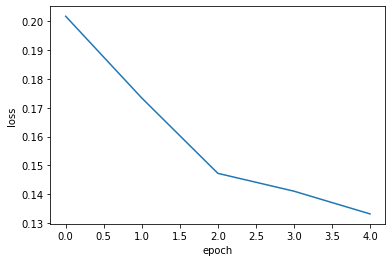

In [17]:
# define model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# define optimizer, loss function, metrics
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# train
model_fit = model.fit(x_train, y_train,
                      batch_size=256, epochs=5, verbose=1,
                      validation_data=(x_dev, y_dev))

print('training time: ', time.time() - start)

print('train loss: ', model_fit.history['loss'][-1])
print('train accuracy: ', model_fit.history['accuracy'][-1])

print('dev loss: ', model_fit.history['val_loss'][-1])
print('dev accuracy: ', model_fit.history['val_accuracy'][-1])

test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=128)
print('test loss: ', test_loss)
print('test accuracy: ', test_acc)

plt.plot(model_fit.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

Epoch 1/10
215/215 [==============================] - 2s 7ms/step - loss: 0.3739 - accuracy: 0.9185 - val_loss: 0.2067 - val_accuracy: 0.9670
Epoch 2/10
215/215 [==============================] - 1s 6ms/step - loss: 0.1832 - accuracy: 0.9699 - val_loss: 0.1699 - val_accuracy: 0.9730
Epoch 3/10
215/215 [==============================] - 1s 6ms/step - loss: 0.1448 - accuracy: 0.9797 - val_loss: 0.1542 - val_accuracy: 0.9776
Epoch 4/10
215/215 [==============================] - 1s 6ms/step - loss: 0.1216 - accuracy: 0.9848 - val_loss: 0.1367 - val_accuracy: 0.9804
Epoch 5/10
215/215 [==============================] - 1s 6ms/step - loss: 0.1069 - accuracy: 0.9874 - val_loss: 0.1338 - val_accuracy: 0.9810
Epoch 6/10
215/215 [==============================] - 1s 6ms/step - loss: 0.0925 - accuracy: 0.9908 - val_loss: 0.1334 - val_accuracy: 0.9792
Epoch 7/10
215/215 [==============================] - 1s 6ms/step - loss: 0.0878 - accuracy: 0.9908 - val_loss: 0.1302 - val_accuracy: 0.9808
Epoch 

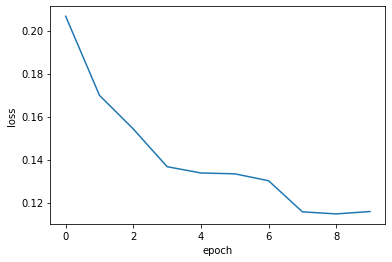

{'loss': [0.373890221118927, 0.18321815133094788, 0.14483046531677246, 0.12163172662258148, 0.10693638771772385, 0.09252466261386871, 0.08776123076677322, 0.07871294021606445, 0.07133286446332932, 0.07211224734783173], 'accuracy': [0.9185090661048889, 0.9699454307556152, 0.9796545505523682, 0.984781801700592, 0.9874181747436523, 0.9907636642456055, 0.990818202495575, 0.9927091002464294, 0.9937454462051392, 0.992618203163147], 'val_loss': [0.206665500998497, 0.16985997557640076, 0.15423478186130524, 0.1366911679506302, 0.13375775516033173, 0.1333732157945633, 0.1301584541797638, 0.11568739265203476, 0.11472272872924805, 0.11583836376667023], 'val_accuracy': [0.9670000076293945, 0.9729999899864197, 0.9775999784469604, 0.980400025844574, 0.9810000061988831, 0.979200005531311, 0.9807999730110168, 0.9824000000953674, 0.9836000204086304, 0.9842000007629395]}


In [18]:
# define model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# define optimizer, loss function, metrics
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# train
model_fit = model.fit(x_train, y_train,
                      batch_size=256, epochs=10, verbose=1,
                      validation_data=(x_dev, y_dev))

print('training time: ', time.time() - start)

print('train loss: ', model_fit.history['loss'][-1])
print('train accuracy: ', model_fit.history['accuracy'][-1])

print('dev loss: ', model_fit.history['val_loss'][-1])
print('dev accuracy: ', model_fit.history['val_accuracy'][-1])

test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=128)
print('test loss: ', test_loss)
print('test accuracy: ', test_acc)

plt.plot(model_fit.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

print(model_fit.history)

Epoch 1/8
215/215 [==============================] - 2s 7ms/step - loss: 0.3763 - accuracy: 0.9178 - val_loss: 0.1970 - val_accuracy: 0.9676
Epoch 2/8
215/215 [==============================] - 1s 6ms/step - loss: 0.1846 - accuracy: 0.9699 - val_loss: 0.1664 - val_accuracy: 0.9746
Epoch 3/8
215/215 [==============================] - 1s 6ms/step - loss: 0.1429 - accuracy: 0.9805 - val_loss: 0.1574 - val_accuracy: 0.9756
Epoch 4/8
215/215 [==============================] - 1s 6ms/step - loss: 0.1231 - accuracy: 0.9843 - val_loss: 0.1400 - val_accuracy: 0.9798
Epoch 5/8
215/215 [==============================] - 1s 6ms/step - loss: 0.1055 - accuracy: 0.9882 - val_loss: 0.1320 - val_accuracy: 0.9802
Epoch 6/8
215/215 [==============================] - 1s 7ms/step - loss: 0.0930 - accuracy: 0.9909 - val_loss: 0.1274 - val_accuracy: 0.9808
Epoch 7/8
215/215 [==============================] - 1s 6ms/step - loss: 0.0858 - accuracy: 0.9918 - val_loss: 0.1180 - val_accuracy: 0.9816
Epoch 8/8
215

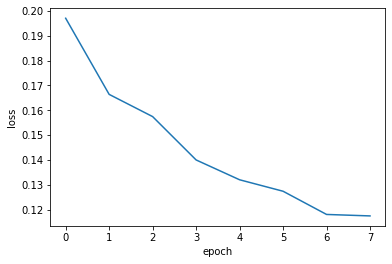

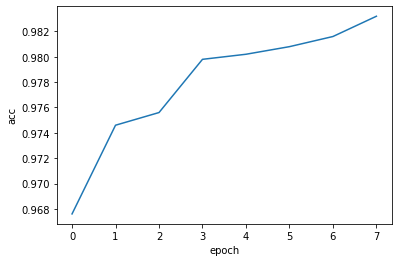

In [19]:
# define model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# define optimizer, loss function, metrics
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# train
model_fit = model.fit(x_train, y_train,
                      batch_size=256, epochs=8, verbose=1,
                      validation_data=(x_dev, y_dev))

print('training time: ', time.time() - start)

print('train loss: ', model_fit.history['loss'][-1])
print('train accuracy: ', model_fit.history['accuracy'][-1])

print('dev loss: ', model_fit.history['val_loss'][-1])
print('dev accuracy: ', model_fit.history['val_accuracy'][-1])

test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=128)
print('test loss: ', test_loss)
print('test accuracy: ', test_acc)

plt.plot(model_fit.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(model_fit.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

Epoch 1/8
430/430 [==============================] - 3s 6ms/step - loss: 0.3214 - accuracy: 0.9315 - val_loss: 0.1787 - val_accuracy: 0.9744
Epoch 2/8
430/430 [==============================] - 2s 5ms/step - loss: 0.1709 - accuracy: 0.9728 - val_loss: 0.1485 - val_accuracy: 0.9792
Epoch 3/8
430/430 [==============================] - 2s 5ms/step - loss: 0.1360 - accuracy: 0.9810 - val_loss: 0.1391 - val_accuracy: 0.9792
Epoch 4/8
430/430 [==============================] - 2s 5ms/step - loss: 0.1181 - accuracy: 0.9838 - val_loss: 0.1317 - val_accuracy: 0.9808
Epoch 5/8
430/430 [==============================] - 2s 5ms/step - loss: 0.1024 - accuracy: 0.9875 - val_loss: 0.1446 - val_accuracy: 0.9762
Epoch 6/8
430/430 [==============================] - 2s 5ms/step - loss: 0.0952 - accuracy: 0.9892 - val_loss: 0.1259 - val_accuracy: 0.9806
Epoch 7/8
430/430 [==============================] - 2s 5ms/step - loss: 0.0884 - accuracy: 0.9895 - val_loss: 0.1208 - val_accuracy: 0.9818
Epoch 8/8
430

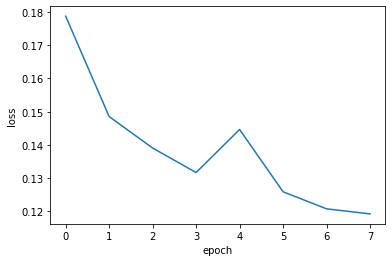

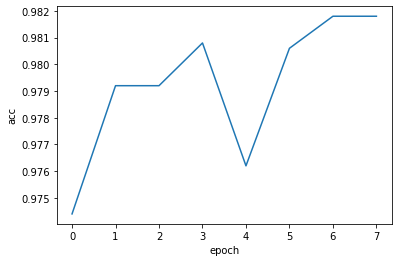

In [20]:
# define model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# define optimizer, loss function, metrics
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# train
model_fit = model.fit(x_train, y_train,
                      batch_size=128, epochs=8, verbose=1,
                      validation_data=(x_dev, y_dev))

print('training time: ', time.time() - start)

print('train loss: ', model_fit.history['loss'][-1])
print('train accuracy: ', model_fit.history['accuracy'][-1])

print('dev loss: ', model_fit.history['val_loss'][-1])
print('dev accuracy: ', model_fit.history['val_accuracy'][-1])

test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=128)
print('test loss: ', test_loss)
print('test accuracy: ', test_acc)

plt.plot(model_fit.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(model_fit.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

Epoch 1/10
426/430 [============================>.] - ETA: 0s - loss: 0.3262 - accuracy: 0.9315
Epoch 1: val_loss improved from inf to 0.17947, saving model to best_model.h5
430/430 [==============================] - 3s 6ms/step - loss: 0.3252 - accuracy: 0.9318 - val_loss: 0.1795 - val_accuracy: 0.9746
Epoch 2/10
430/430 [==============================] - ETA: 0s - loss: 0.1696 - accuracy: 0.9725
Epoch 2: val_loss improved from 0.17947 to 0.15870, saving model to best_model.h5
430/430 [==============================] - 2s 6ms/step - loss: 0.1696 - accuracy: 0.9725 - val_loss: 0.1587 - val_accuracy: 0.9756
Epoch 3/10
429/430 [============================>.] - ETA: 0s - loss: 0.1362 - accuracy: 0.9809
Epoch 3: val_loss improved from 0.15870 to 0.14900, saving model to best_model.h5
430/430 [==============================] - 3s 6ms/step - loss: 0.1362 - accuracy: 0.9809 - val_loss: 0.1490 - val_accuracy: 0.9760
Epoch 4/10
427/430 [============================>.] - ETA: 0s - loss: 0.1175 

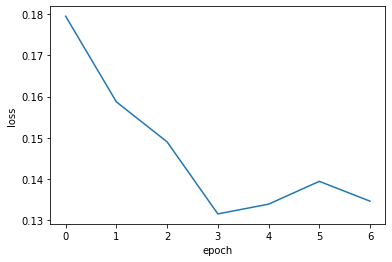

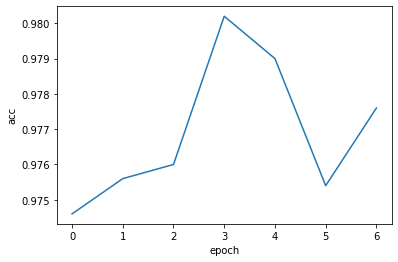

In [21]:
# early stopping
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

# define model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# define optimizer, loss function, metrics
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# train
model_fit = model.fit(x_train, y_train,
                      batch_size=128, epochs=10, verbose=1,
                      validation_data=(x_dev, y_dev), callbacks=[early_stopping, model_checkpoint])

print('training time: ', time.time() - start)

print('train loss: ', model_fit.history['loss'][-1])
print('train accuracy: ', model_fit.history['accuracy'][-1])

print('dev loss: ', model_fit.history['val_loss'][-1])
print('dev accuracy: ', model_fit.history['val_accuracy'][-1])

test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=128)
print('test loss: ', test_loss)
print('test accuracy: ', test_acc)

plt.plot(model_fit.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(model_fit.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [22]:
best_model = keras.models.load_model('best_model.h5')
best_test_loss, best_test_acc = best_model.evaluate(x_test, y_test)
print('best test model loss: ', best_test_loss)
print('best test model accuracy: ', best_test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.1402 - accuracy: 0.9774
best test model loss:  0.14018495380878448
best test model accuracy:  0.977400004863739


Epoch 1/50
426/430 [============================>.] - ETA: 0s - loss: 0.3216 - accuracy: 0.9314
Epoch 1: val_loss improved from inf to 0.18482, saving model to best_model.h5
430/430 [==============================] - 3s 6ms/step - loss: 0.3205 - accuracy: 0.9317 - val_loss: 0.1848 - val_accuracy: 0.9674
Epoch 2/50
426/430 [============================>.] - ETA: 0s - loss: 0.1688 - accuracy: 0.9734
Epoch 2: val_loss improved from 0.18482 to 0.15409, saving model to best_model.h5
430/430 [==============================] - 2s 6ms/step - loss: 0.1688 - accuracy: 0.9735 - val_loss: 0.1541 - val_accuracy: 0.9762
Epoch 3/50
428/430 [============================>.] - ETA: 0s - loss: 0.1319 - accuracy: 0.9817
Epoch 3: val_loss improved from 0.15409 to 0.14213, saving model to best_model.h5
430/430 [==============================] - 2s 6ms/step - loss: 0.1320 - accuracy: 0.9817 - val_loss: 0.1421 - val_accuracy: 0.9778
Epoch 4/50
424/430 [============================>.] - ETA: 0s - loss: 0.1144 

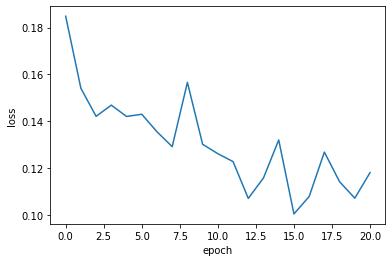

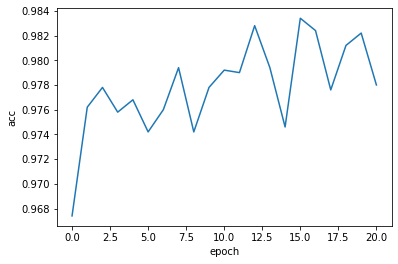

313/313 [==============================] - 0s 1ms/step - loss: 0.1030 - accuracy: 0.9818
best test model loss:  0.1030331552028656
best test model accuracy:  0.9818000197410583


In [23]:
# early stopping
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

# define model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# define optimizer, loss function, metrics
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# train
model_fit = model.fit(x_train, y_train,
                      batch_size=128, epochs=50, verbose=1,
                      validation_data=(x_dev, y_dev), callbacks=[early_stopping, model_checkpoint])

print('training time: ', time.time() - start)

print('train loss: ', model_fit.history['loss'][-1])
print('train accuracy: ', model_fit.history['accuracy'][-1])

print('dev loss: ', model_fit.history['val_loss'][-1])
print('dev accuracy: ', model_fit.history['val_accuracy'][-1])

plt.plot(model_fit.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(model_fit.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

best_model = keras.models.load_model('best_model.h5')
best_test_loss, best_test_acc = best_model.evaluate(x_test, y_test)
print('best test model loss: ', best_test_loss)
print('best test model accuracy: ', best_test_acc)

Epoch 1/50
425/430 [============================>.] - ETA: 0s - loss: 0.3325 - accuracy: 0.9292
Epoch 1: val_loss improved from inf to 0.17613, saving model to best_model.h5
430/430 [==============================] - 3s 6ms/step - loss: 0.3310 - accuracy: 0.9295 - val_loss: 0.1761 - val_accuracy: 0.9748
Epoch 2/50
422/430 [============================>.] - ETA: 0s - loss: 0.1755 - accuracy: 0.9717
Epoch 2: val_loss improved from 0.17613 to 0.15858, saving model to best_model.h5
430/430 [==============================] - 2s 6ms/step - loss: 0.1755 - accuracy: 0.9716 - val_loss: 0.1586 - val_accuracy: 0.9776
Epoch 3/50
425/430 [============================>.] - ETA: 0s - loss: 0.1389 - accuracy: 0.9804
Epoch 3: val_loss improved from 0.15858 to 0.14494, saving model to best_model.h5
430/430 [==============================] - 2s 6ms/step - loss: 0.1389 - accuracy: 0.9804 - val_loss: 0.1449 - val_accuracy: 0.9806
Epoch 4/50
421/430 [============================>.] - ETA: 0s - loss: 0.1211 

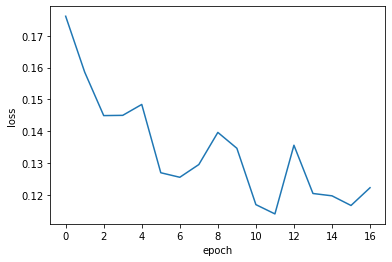

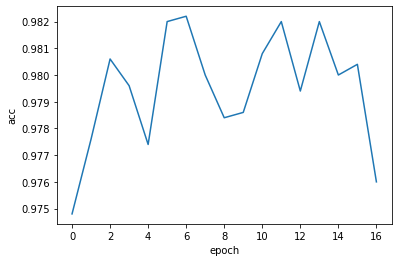

313/313 [==============================] - 0s 1ms/step - loss: 0.1120 - accuracy: 0.9816
best test model loss:  0.1120302602648735
best test model accuracy:  0.9815999865531921


In [24]:
# early stopping
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

# define model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    
    #dropout regularization
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# define optimizer, loss function, metrics
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# train
model_fit = model.fit(x_train, y_train,
                      batch_size=128, epochs=50, verbose=1,
                      validation_data=(x_dev, y_dev), callbacks=[early_stopping, model_checkpoint])

print('training time: ', time.time() - start)

print('train loss: ', model_fit.history['loss'][-1])
print('train accuracy: ', model_fit.history['accuracy'][-1])

print('dev loss: ', model_fit.history['val_loss'][-1])
print('dev accuracy: ', model_fit.history['val_accuracy'][-1])

plt.plot(model_fit.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(model_fit.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

best_model = keras.models.load_model('best_model.h5')
best_test_loss, best_test_acc = best_model.evaluate(x_test, y_test)
print('best test model loss: ', best_test_loss)
print('best test model accuracy: ', best_test_acc)

Epoch 1/50
422/430 [============================>.] - ETA: 0s - loss: 0.3070 - accuracy: 0.9350
Epoch 1: val_loss improved from inf to 0.20520, saving model to best_model.h5
430/430 [==============================] - 3s 7ms/step - loss: 0.3051 - accuracy: 0.9356 - val_loss: 0.2052 - val_accuracy: 0.9664
Epoch 2/50
422/430 [============================>.] - ETA: 0s - loss: 0.1758 - accuracy: 0.9733
Epoch 2: val_loss improved from 0.20520 to 0.18148, saving model to best_model.h5
430/430 [==============================] - 3s 6ms/step - loss: 0.1761 - accuracy: 0.9733 - val_loss: 0.1815 - val_accuracy: 0.9692
Epoch 3/50
428/430 [============================>.] - ETA: 0s - loss: 0.1477 - accuracy: 0.9793
Epoch 3: val_loss did not improve from 0.18148
430/430 [==============================] - 3s 6ms/step - loss: 0.1477 - accuracy: 0.9793 - val_loss: 0.1875 - val_accuracy: 0.9710
Epoch 4/50
429/430 [============================>.] - ETA: 0s - loss: 0.1300 - accuracy: 0.9838
Epoch 4: val_los

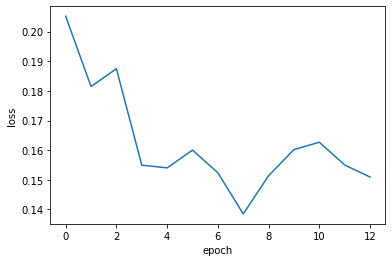

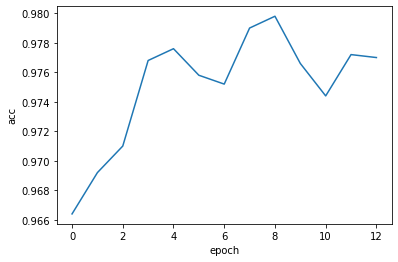

313/313 [==============================] - 0s 1ms/step - loss: 0.1409 - accuracy: 0.9778
best test model loss:  0.14090092480182648
best test model accuracy:  0.9778000116348267


In [26]:
# early stopping
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

# define model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    
    # dropout regularization
    tf.keras.layers.Dropout(0.2),
    
    # batch normalization
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# define optimizer, loss function, metrics
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# train
model_fit = model.fit(x_train, y_train,
                      batch_size=128, epochs=50, verbose=1,
                      validation_data=(x_dev, y_dev), callbacks=[early_stopping, model_checkpoint])

print('training time: ', time.time() - start)

print('train loss: ', model_fit.history['loss'][-1])
print('train accuracy: ', model_fit.history['accuracy'][-1])

print('dev loss: ', model_fit.history['val_loss'][-1])
print('dev accuracy: ', model_fit.history['val_accuracy'][-1])

plt.plot(model_fit.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(model_fit.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

best_model = keras.models.load_model('best_model.h5')
best_test_loss, best_test_acc = best_model.evaluate(x_test, y_test)
print('best test model loss: ', best_test_loss)
print('best test model accuracy: ', best_test_acc)